# Artificial Neural Networks on Real Examples

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow import keras
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print('GPU', tf.test.gpu_device_name(), 'configured')

GPU /device:GPU:0 configured


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

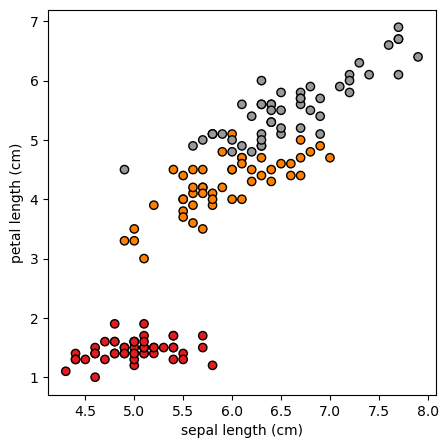

In [3]:
import matplotlib.pyplot as plt

class_names = iris.target_names

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

First, we need to modify the output structures

In [5]:
y[:5]

array([0, 0, 0, 0, 0])

In [6]:
y = y.reshape(-1, 1)
ct = ColumnTransformer([("one-hot", OneHotEncoder(), [0])], remainder="passthrough")
y = ct.fit_transform(y)

In [7]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=[4]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0, 
                   validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

1/1 [==============================] - 0s 26ms/step - loss: 0.2138 - accuracy: 1.0000
Loss: 0.21384897828102112
Accuracy: 1.0


Lets plot the training and testing loss values per epoch

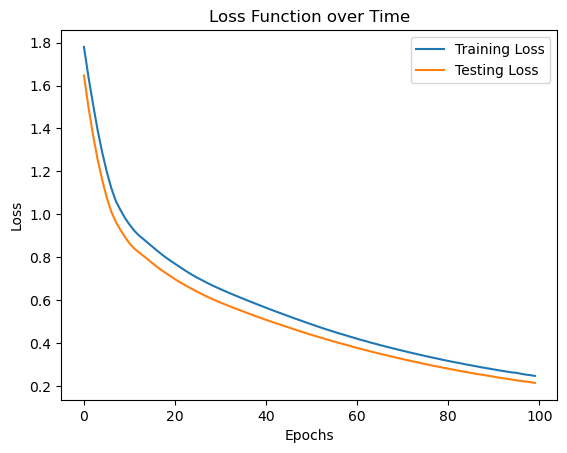

In [9]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and testing loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function over Time')
plt.legend()
plt.show()

... and the training and testing accuracy values per epoch

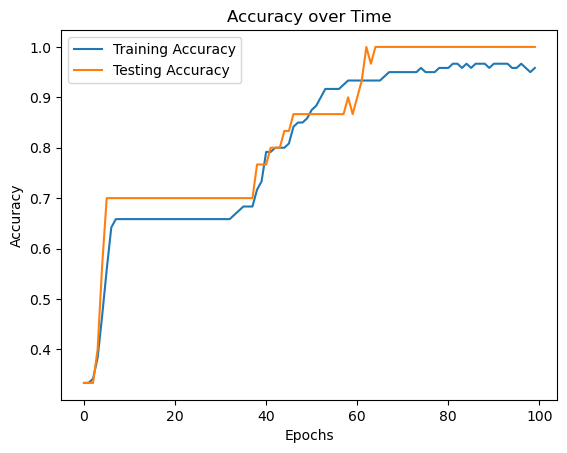

In [10]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Plot the training and testing accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')
plt.legend()
plt.show()

Now, lets select the best two features for plotting the decision boundaries...

In [11]:
selected_features = [0, 2]

X_train_2 = X_train[:, selected_features]
X_test_2 = X_test[:, selected_features]

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=[2]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the classifier
model.fit(X_train_2, y_train, epochs=100, verbose=0)

3249/3249 [==============================] - 4s 1ms/step


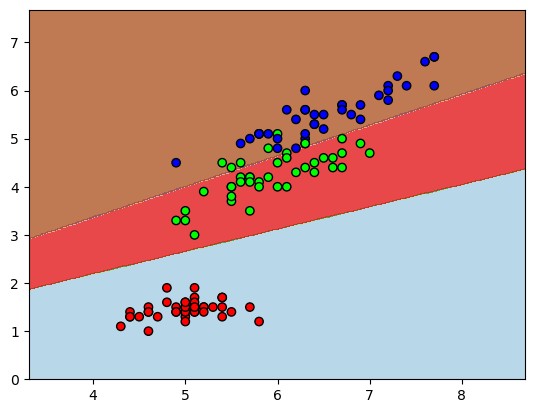

In [12]:
import numpy as np

def plot_surface(X, y, clf, plain_y=True):

    # Plot the separation hyperplane
    # Generate a grid of points that span the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Obtain the predicted labels for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    if plain_y:
        # Convert the three output into the selected one ...
        Z = np.argmax(Z, axis=1)

    # Reshape the predicted labels into the grid shape
    Z = Z.reshape(xx.shape)

    # Plot the contour filled with the predicted labels
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    # Show the plot
    plt.show()

plot_surface(X_train_2, y_train, model)


## Moon dataset
This is a synthetic dataset, so it is very good for testing and learning

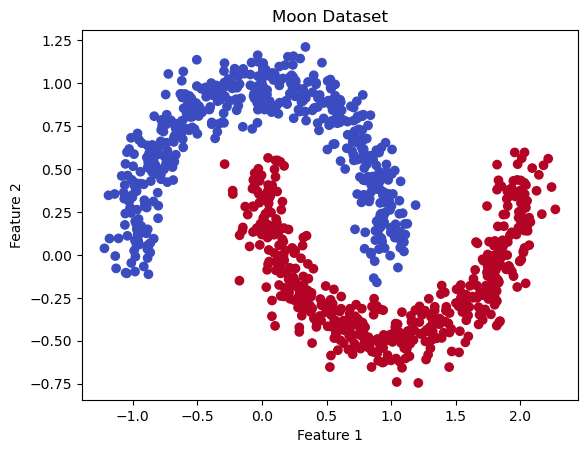

In [13]:
from sklearn.datasets import make_moons

# Generate the moon dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Plot the moon dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moon Dataset')
plt.show()

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=[2]),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9050
Loss: 0.2037823647260666
Accuracy: 0.9049999713897705


In [15]:
def plot_classification_regions(X, y, clf, border=1, step=0.02):
    # Plot the separation hyperplane
    # Generate a grid of points that span the feature space
    x_min, x_max = X[:, 0].min() - border, X[:, 0].max() + border
    y_min, y_max = X[:, 1].min() - border, X[:, 1].max() + border
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

    # Obtain the predicted labels for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predicted labels into the grid shape
    Z = Z.reshape(xx.shape)

    # Plot the contour filled with the predicted labels
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Reds)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Reds)

    # Show the plot
    plt.colorbar()
    plt.show()

607/607 [==============================] - 1s 1ms/step


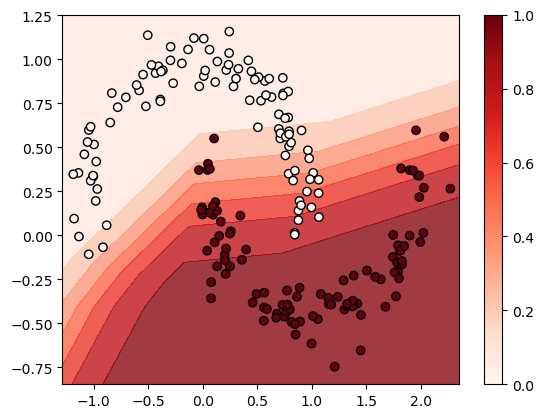

In [16]:
plot_classification_regions(X_test, y_test, model, 0.1)

Lets try another architecture to see if we can improve the result

In [17]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=[2]),
    keras.layers.Dense(10, activation='relu', input_shape=[2]),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 1.0000
Loss: 0.04299650713801384
Accuracy: 1.0


607/607 [==============================] - 1s 1ms/step


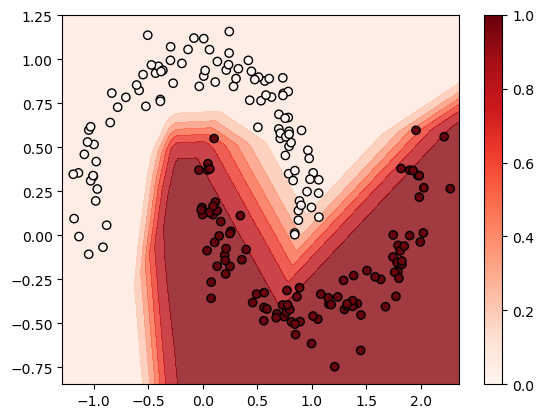

In [18]:
plot_classification_regions(X_test, y_test, model, 0.1)

## Circle dataset
- Also synthetic

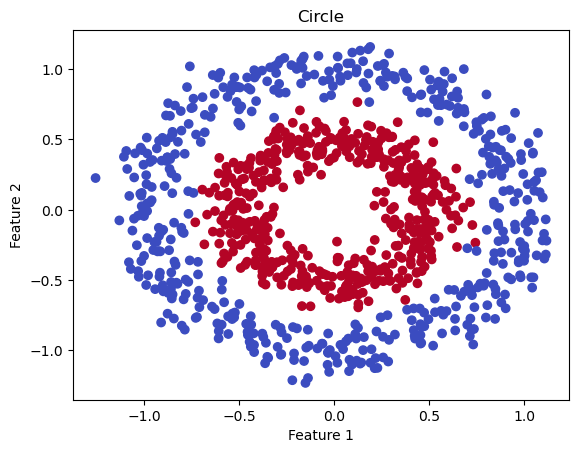

In [19]:
from sklearn.datasets import make_circles

# Generate the circles dataset
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Plot the moon dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circle')
plt.show()


Since it is more complex than the previous one, lets test directly the 2 hidden layers model

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=[2]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9800
Loss: 0.05118480697274208
Accuracy: 0.9800000190734863


450/450 [==============================] - 1s 1ms/step


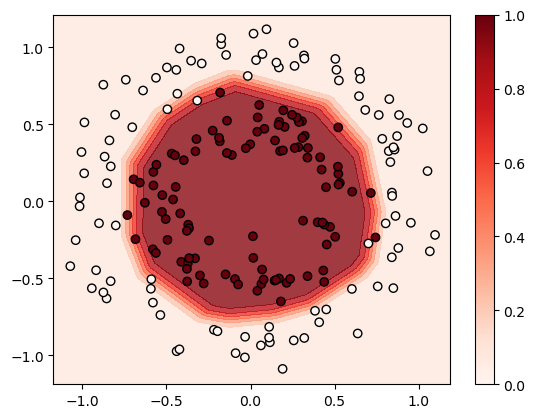

In [21]:
plot_classification_regions(X_test, y_test, model, 0.1)

## Spiral dataset

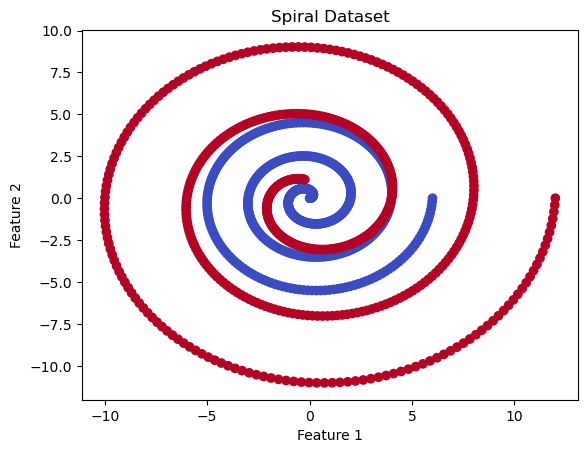

In [22]:
def generate_spiral(n_samples, n_classes, radius, laps, noise, start_angle=0):
    angles = np.linspace(start_angle, 2 * np.pi * laps, n_samples)
    radius_diff = radius / n_classes
    data = []
    labels = []
    
    for class_index in range(n_classes):
        class_radius = radius - class_index * radius_diff
        class_noise = noise * class_index / n_classes
        
        for angle in angles:
            r = class_radius * angle / (2 * np.pi)
            x = r * np.cos(angle) + np.random.randn() * class_noise
            y = r * np.sin(angle) + np.random.randn() * class_noise
            label = class_index
            
            data.append([x, y])
            labels.append(label)
    
    return np.array(data), np.array(labels)

# Generate the spiral dataset
X1, y1 = generate_spiral(n_samples=500, n_classes=1, radius=2, laps=3, noise=0.1, start_angle=0)
X2, y2 = generate_spiral(n_samples=500, n_classes=1, radius=4, laps=3, noise=0.1, start_angle=1.78)
y2[:] = 1

X = np.concatenate([X1, X2], axis=0)
y = np.concatenate([y1, y2], axis=0)

# Plot the spiral dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spiral Dataset')
plt.show()

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=[2]),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9800
Loss: 0.054791394621133804
Accuracy: 0.9800000190734863


1396/1396 [==============================] - 2s 1ms/step


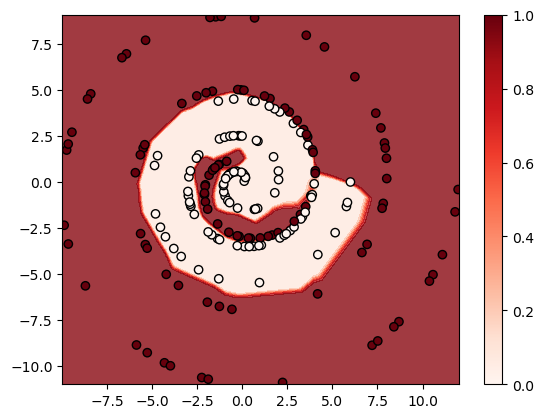

In [24]:
plot_classification_regions(X_test, y_test, model, 0.1, step=0.1)